In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from scipy import stats
from sklearn import metrics
%matplotlib inline

In [20]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [53]:
#Checking datafram for null values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [12]:
credit_df = df.drop('ID', axis = 1)
credit_df.head()

#dropping the ID as we don't need to use unique identifier for the purpose of this project. 

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [52]:
#Initial EDA to see how data looks like and the relationship between dependent and independent variables

print(credit_df['Education'].value_counts())
print(credit_df['Family'].value_counts())

1    2096
3    1501
2    1403
Name: Education, dtype: int64
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


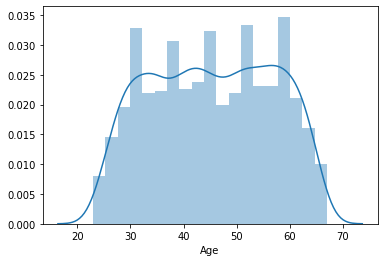

In [13]:
#Checking Age distribution inside Data
sns.distplot(df['Age'])

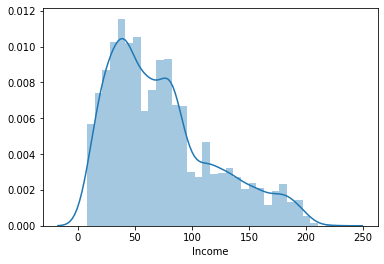

In [14]:
#Checking distribution of Income 
sns.distplot(df['Income'])

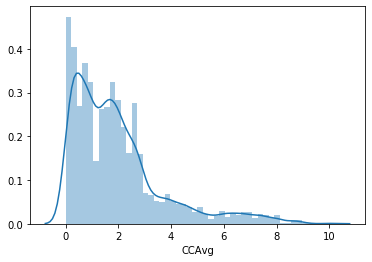

In [58]:
#Checking distribution of Income 
sns.distplot(df['CCAvg'])

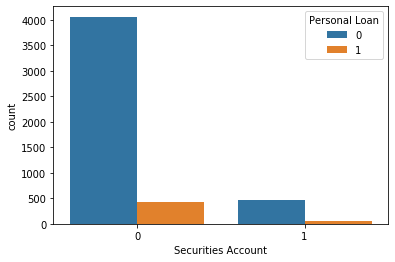

In [62]:
sns.countplot(df['Securities Account'], hue=df['Personal Loan'])

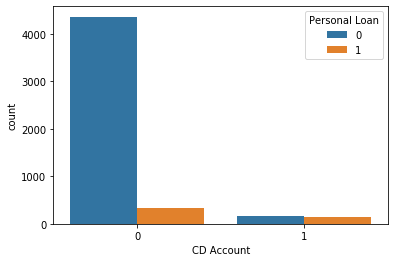

In [63]:
sns.countplot(df['CD Account'], hue=df['Personal Loan'])

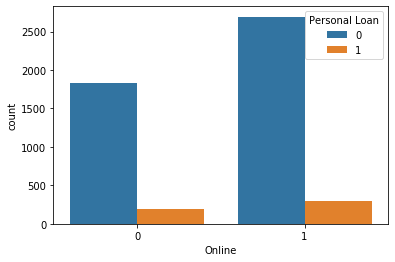

In [64]:
sns.countplot(df['Online'], hue=df['Personal Loan'])

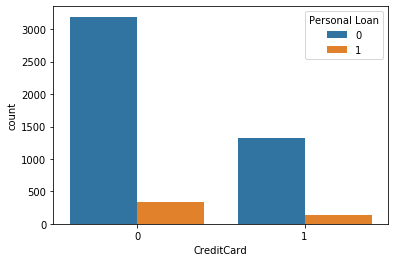

In [65]:
sns.countplot(df['CreditCard'], hue=df['Personal Loan'])


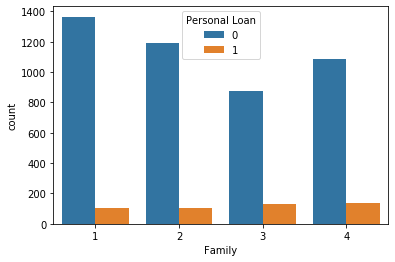

In [54]:
sns.countplot(df['Family'], hue=df['Personal Loan'])

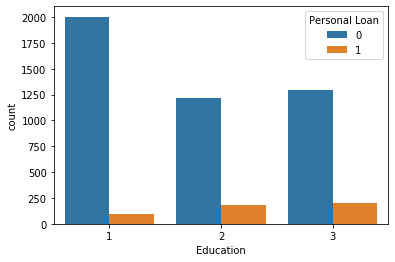

In [55]:
sns.countplot(df['Education'], hue=df['Personal Loan'])

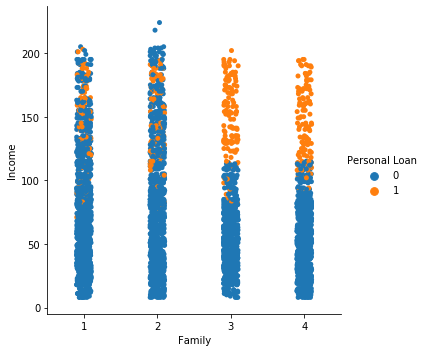

In [33]:
sns.catplot(x="Family", y="Income", data = df, hue="Personal Loan")

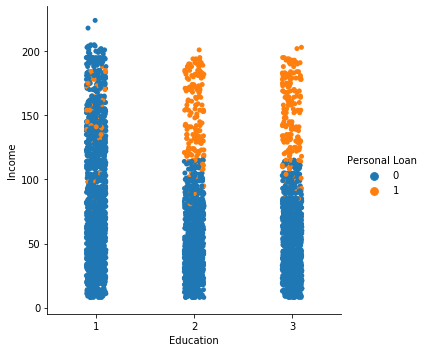

In [34]:
sns.catplot(x="Education", y="Income", data = df, hue="Personal Loan")

In [ ]:
"""
Checking from EDA above, we can see that data is imbalance in a sense that the amount of people taking personal loan is far 
less as compared to people that rejected them

There seems to be correlation in successful loan applicants with their education or the number of family they have. 

From CD count plot, it looks like the chance of successful applicant is higher if you have CD account with the bank. 

From Income distribution below, We can say that all applicants that buy the personal loan earn around $100,000 yearly. 
This is definitely a good indicator to find customer that is more likely to buy personal loan


"""

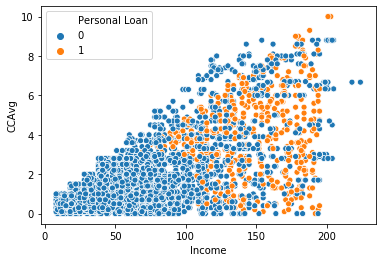

In [111]:
sns.scatterplot(x='Income', y='CCAvg', data=df, hue='Personal Loan')

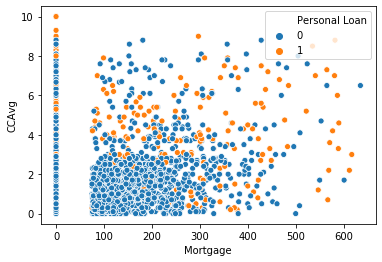

In [66]:
sns.scatterplot(x='Mortgage', y='CCAvg', data=df, hue='Personal Loan')

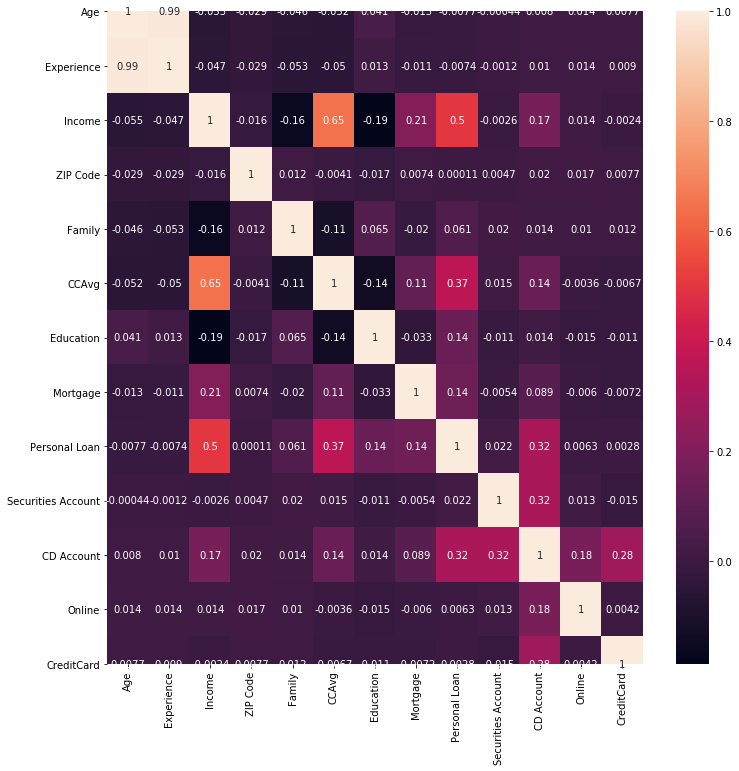

In [43]:
plt.figure(figsize = (12,12))
sns.heatmap(credit_df.corr(), annot = True)

In [ ]:
# For this exercise, we are looking at customer who agree to take personal loan as our target columns. As this is the number that 
# the bank would like to focus on to reduce their liability

In [69]:
# Dropping personal loan from dataframe and recreate them as target column

X=credit_df.drop('Personal Loan', axis=1)
Y=credit_df[['Personal Loan']]

# Splitting the data into training and test set with ratio of 70:30

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

lg_reg = LogisticRegression()
lg_reg.fit(X_train, y_train)

C:\Users\Home\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix
pred_train = lg_reg.predict(X_train)
confsn_matrx = confusion_matrix(y_train, pred_train)
print("confusion matrix = \n", confsn_matrx)

confusion matrix = 
 [[3072   97]
 [ 224  107]]


In [75]:
pred_test = lg_reg.predict(X_test)
confsn_matrx_test = confusion_matrix(y_test, pred_test)
print("confusion matrix test data = \n", confsn_matrx_test)

confusion matrix test data = 
 [[1318   33]
 [ 105   44]]


In [79]:
print(classification_report(y_train, pred_train))
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3169
           1       0.52      0.32      0.40       331

    accuracy                           0.91      3500
   macro avg       0.73      0.65      0.68      3500
weighted avg       0.89      0.91      0.90      3500

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.30      0.39       149

    accuracy                           0.91      1500
   macro avg       0.75      0.64      0.67      1500
weighted avg       0.89      0.91      0.89      1500



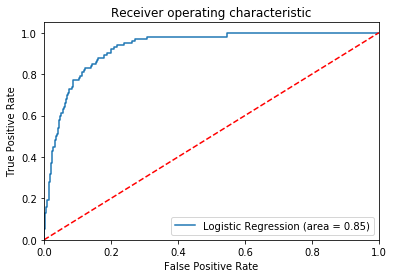

In [114]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, pred_test)
fpr, tpr, thresholds = roc_curve(y_test, lg_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [78]:
auc_score = metrics.roc_auc_score(y_test, lg_reg.predict_proba(X_test)[:,1])
round( float( auc_score ), 2 )

0.91

(0, 1)

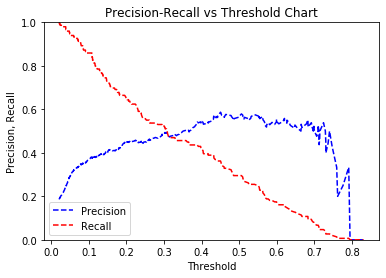

In [84]:
### Predict test_y values and probabilities based on fitted logistic regression model

pred_y=lg_reg.predict(X_test) 

probs_y=lg_reg.predict_proba(X_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of   array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 
1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [ ]:
# From above exercise, we can see that the model perform really well in predicting whether or not the customer will take 
# the personal loan conversion from the bank. Although the precision and recall values are low, taking the f1-score shows that
# the model performed better than in previous campaign.
# it can be improved upon by changing the test size, undersampling the customer that did not take the conversion or oversampling \
# customer that did take the conversion offer from the bank. 
# 
# Other than that, what we can do is by removing attribute that less likely to contribute to our target for example by using
# feature selection. 